# Final project report
### Baryktabasova Aichurok (2017-2018)

## 1. Введение
В качестве данных для нашего проекта мы взяли "Boston house-price data" of Harrison, D. and Rubinfeld, D.L.: Hedonic prices and the demand for clean air, J. Environ. Economics & Management, 5: 81-102, 1978. Ссылка на страницу http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/boston.html , и ссылка на данные http://lib.stat.cmu.edu/datasets/boston_corrected.txt . Датасет содержит статистику по различным районам и городам штата Массачусетс по средним ценам домов, а также по признакам, которые могут влиять на эту цену. Нас интересует, насколько сильно и как именно признаки влияют на цену дома, а также, как мы можем по извеcтным значениям признаков предсказать среднюю цену (Регрессионные модели) и как мы можем разделить районы на разные группы по каким-либо свойствам (кластеризация).

## 2. Описание датасета
Датасет содержит 506 объектов и 20 признаков, впрочем, после препроцессинга останется лишь 92 объекта и 14 признаков. Описания последних:
<br>
<br>CRIM=====per capita crime rate by town
<br>ZN=======proportion of residential land zoned for lots over 25,000 sq.ft.
<br>INDUS====proportion of non-retail business acres per town
<br>CHAS=====Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
<br>NOX======nitric oxides concentration (parts per 10 million)
<br>RM=======average number of rooms per dwelling
<br>AGE======proportion of owner-occupied units built prior to 1940
<br>DIS======weighted distances to five Boston employment centres
<br>RAD======index of accessibility to radial highways
<br>TAX======full-value property-tax rate per \$10,000
<br>PTRATIO==pupil-teacher ratio by town
<br>B========1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
<br>LSTAT====\% lower status of the population
<br>MEDV=====Median value of owner-occupied homes in \$1000's
<br>
<br>Изначальный датасет представлен ниже:

In [1]:
import pandas as pd
rawData = pd.read_csv('ourData.txt', sep = '\t', index_col = 0)
rawData

,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
OBS.,,,,,,,,,,,,,,,,,,,,
1,Nahant,0,2011,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,Swampscott,1,2021,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,Swampscott,1,2022,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,Marblehead,2,2031,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,Marblehead,2,2032,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,Marblehead,2,2033,-70.9165,42.3040,28.7,28.7,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
7,Salem,3,2041,-70.9360,42.2970,22.9,22.9,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
8,Salem,3,2042,-70.9375,42.3100,27.1,22.1,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
9,Salem,3,2043,-70.9330,42.3120,16.5,16.5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93


## 3. Методология
Для всей работы мы использовали язык Python 3, в том числе, пакеты:

pandas - для операций над датасетами

numpy - для использования некоторых структур в ходе работы

sklearn - все алгоритмы

matplotlib.pyplot - для визуального представления результатов

In [2]:
import matplotlib.pyplot as plt

%pylab inline
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import model_selection

Populating the interactive namespace from numpy and matplotlib


## 4. Препроцессинг
Перед тем, как начать работу, мы должны как-то разобраться с лишними признаками и повторяющимися городами. Исключим лишние признаки и усредним данные по одинаковым городам в один объект. Также, чтобы сделать все данные числовыми, уберём названия городов из датасета.

In [3]:
rawData = pd.read_csv('ourData.txt', sep = '\t', index_col = 0)
rawData = rawData.drop(['TRACT', 'LON', 'LAT', 'CMEDV'], axis = 1)
data = pd.DataFrame()
for i in range(92):
    curTownName = rawData.iloc[np.where(rawData['TOWN#'] == i)]['TOWN'].iloc[0]
    curStr = pd.concat([pd.DataFrame.from_dict(data = {'TOWN': [rawData.iloc[np.where(rawData['TOWN#'] == i)]['TOWN'].iloc[0]]}).T,
                        rawData.iloc[np.where(rawData['TOWN#'] == i)].mean(axis = 0, numeric_only = True)],
                       axis = 0).T
    data = pd.concat([data, curStr], axis = 0)
data = data.drop(['TOWN'], axis = 1)
data[['TOWN#']] = data[['TOWN#']].astype(int64)
data

,TOWN#,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,24,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
0,1,28.15,0.0273,0,7.07,0,0.469,6.803,70,4.9671,2,242,17.8,394.865,6.585
0,2,32.7667,0.0437567,0,2.18,0,0.458,6.85833,52.9,6.0622,3,222,18.7,395.217,4.49333
0,3,20.1429,0.150037,12.5,7.87,0,0.524,6.01343,80.6857,6.02993,5,311,15.2,392.251,18.2914
0,4,16.7136,0.964475,0,8.14,0,0.538,5.93459,82.1591,4.20582,4,307,21,359.654,15.29
0,5,21.15,0.1042,0,5.96,0,0.499,5.8975,50.325,3.62993,5,279,19.2,391.198,9.9975
0,6,32.85,0.03061,75,2.95,0,0.428,6.8095,18.8,5.4011,3,252,18.3,395.625,3.15
0,7,20.8333,0.179298,0,6.91,0,0.448,5.96867,40.6556,5.63683,3,233,17.9,392.552,13.09
0,8,22.15,0.0588775,21,5.64,0,0.439,6.14675,37.8,6.8147,4,243,16.8,395.832,9.1475
0,9,18.9,0.0136,75,4,0,0.41,5.888,47.6,7.3197,3,469,21.1,396.9,14.8


Теперь разделим данные на features и target, а также на обучающую и тестовую выборки в пропорции 7:3.

In [4]:
data = data.set_index('TOWN#', drop = True)
dataTarget = (data.MEDV.as_matrix()).astype(double)
dataFeatures = (data[data.columns.difference(['MEDV'])].as_matrix()).astype(double)
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataFeatures, dataTarget, test_size = 0.3, random_state = 321)

## 5. Кластеризация

При кластеризации мы рассмотрим следующие методы кластеризации:

1)k-Means

2)Агломеративная кластеризация(Agglomerative clustering)

3)Метод распространения близости(Affinity propagation)

## K-Means

Для того,что представить задачу кластреризации как оптимизационную при использовании метода k-means будем минимизировать - сумму квадратов расстояний от точек до центроидов кластеров, к которым они относятся. 

$J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k||^{2} \rightarrow \min\limits_C$, где С - множество кластеров мощности К, $\mu_k$ - центроид кластера $C_k$.

Для решения выбора числа кластеров используем следующий метод: выбирем то число кластеров, начиная с которого J(C) уменьшается "уже не так быстро"

Видим, что $J(C_{k})$ падает сильно при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так сильно – при изменении k с 3 до 4. Значит, в данной задаче оптимально задать 3 кластера.

Далее для того, чтобы исследовать кластеры, на которые поделил метод k-Means, посчитаем среднее значение каждого признака. Затем из класса sklearn.cluster импортируем функцию KMeans() для n_clusters= 3.Алгоритм k-means строит заданное число кластеров, 3 кластера в нашем случае, расположенных как можно дальше друг от друга. Выведем таблицу центров кластеров. Опираясь на данную таблицу, мы можем предположить, что:

1) В cluster0 попали объекты с большим значением переменной TAX, значение TAX в cluster0 превышает почти вдвое среднего значения ТАХ. Также можно заметить, что среднее значение ZN равно 0, то есть в этом кластере находятся объекты с долей жилой  земли, зональной для участков более 25 000 кв. футов, равной 0. В cluster0 находятся объекты с очень высоким уровнем преступности на душу населения в среднем, равное 11.12.Действительно, если посмотреть, то в cluster0 попали районы города Бостона, для которых полная стоимость налога на имущество 10 000 долларов США равна в среднем 666 долларов и нет жилой земли, зональной для участков более 25 000 кв. футов.

2) В cluster1 попали объекты с высоким показателем параметра B, также в cluster1 самый низкий средний налог на имущество 10 000 долларов и более низкий статус населения, по сравнению с cluster0 и cluster2

3)В cluster2 попали объекты с самым высоким показателем параметра DIS(взвешенные расстояния до пяти центров занятости в Бостоне), то есть можно предположить,чтоэти районы самые удаленные от пяти центров занятости в Бостоне. Также можно предположить, что основная часть объектов в cluster2 не находится по течению реки Charles, так как CHAR равен 0.1

В качестве результата работы алгоритма получаем центры кластеров.Недостатком данного алгоритма является необходимость задавать количество кластеров для разбиения.

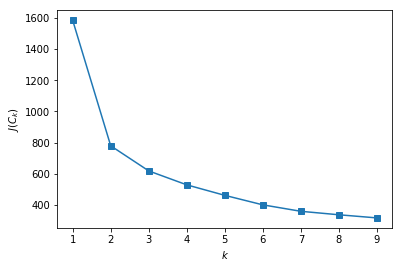

In [5]:
dataFeatures = data.as_matrix()

from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(dataFeatures)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [6]:
dataFeatures.mean(0)

array([25.28034904574913, 2.044119930174472, 29.005434782608695,
       7.858478260869568, 0.05940931049626702, 0.4938373973632741,
       6.431155407548876, 53.92547273659029, 5.128496430334531,
       7.054347826086956, 363.45652173913044, 17.930434782608707,
       377.99843094059315, 9.991991449164123], dtype=object)

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

kmeans = KMeans(n_clusters=3,init="random", random_state=0).fit(dataFeatures)
y = kmeans.fit_predict(dataFeatures)

# 3 clusters
cluster0 = []
cluster1 = []
cluster2 = []
for i in range(92):
    if y[i] == 0:
        cluster0.append(i)  
for i in range(92):
    if y[i] == 1:
        cluster1.append(i) 
for i in range(92):
    if y[i] == 2:
        cluster2.append(i)
        
centroids = kmeans.cluster_centers_          
grandmean = [25.28, 2.04, 29.01, 7.86, 0.06, 0.49, 6.43, 53.93, 5.13, 7.05, 363.46, 17.93, 378.0, 9.99]
centroids[0] = np.round(centroids[0],2)
centroids[1] = np.round(centroids[1],2)
centroids[2] = np.round(centroids[2],2)
np.set_printoptions(suppress=True)

print("")
print("             MEDV    CRIM   ZN    INDUS  CHAS   NOX    RM     AGE    DIS     RAD    TAX    PTRATIO  B      LSTAT")
print("")
print('Grandmean:   '  + '   '.join([str(x) for x in grandmean]))
print("")
print("Количество элементов в Cluster0:",len(cluster0))
print("Количество элементов в Cluster1:",len(cluster1))
print("Количество элементов в Cluster2:",len(cluster2))

print("")
print("В cluster0 находятся следующие объекты :", cluster0)
print("")
print("В cluster1 находятся следующие объекты :", cluster1)
print("")
print("В cluster2 находятся следующие объекты :", cluster2)

res = pd.DataFrame(data=centroids, 
        columns=['MEDV', 'CRIM', 'ZN','INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'],
        index=['Cluster0', 'Cluster1','Cluster2'])
res


             MEDV    CRIM   ZN    INDUS  CHAS   NOX    RM     AGE    DIS     RAD    TAX    PTRATIO  B      LSTAT

Grandmean:   25.28   2.04   29.01   7.86   0.06   0.49   6.43   53.93   5.13   7.05   363.46   17.93   378.0   9.99

Количество элементов в Cluster0: 16
Количество элементов в Cluster1: 52
Количество элементов в Cluster2: 24

В cluster0 находятся следующие объекты : [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]

В cluster1 находятся следующие объекты : [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 26, 29, 30, 32, 33, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 62, 63, 64, 69, 72, 91]

В cluster2 находятся следующие объекты : [9, 15, 16, 18, 24, 25, 27, 28, 31, 34, 35, 36, 42, 56, 57, 61, 65, 66, 67, 68, 70, 71, 73, 90]


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Cluster0,19.13,11.12,0.00,18.70,0.09,0.65,5.93,88.35,2.08,22.75,668.81,20.19,329.70,17.82
Cluster1,27.97,0.11,33.70,5.44,0.07,0.46,6.62,47.93,5.57,3.58,262.35,17.33,390.25,7.99
Cluster2,23.56,0.18,38.17,5.87,0.01,0.47,6.37,43.97,6.19,4.13,378.96,17.72,383.66,9.11


## Affinity propagation
Рассмотрим  алгоритм affinity propagation.В отличие от алгоритма К-средних, данный подход не требует заранее определять число кластеров, на которое мы хотим разбить наши данные. Основная идея алгоритма заключается в том, что нам хотелось бы, чтобы наши наблюдения кластеризовались в группы на основе того,насколько они похожи друг на друга.
Заведём для этого какую-нибудь метрику "похожести", определяющуюся тем, что $s(x_i, x_j) > s(x_i, x_k)$ если наблюдение $x_i$ больше похоже на наблюдение $x_j$, чем на $x_k$. Простым примером такой похожести будет отрицательный квадрат расстояния: $s(x_i, x_j) = - ||x_i - x_j||^{2}$

Можно увидеть логику разделения на кластеры: так, кластеры 7-9 были сформированы из различных районов города Бостон, в Cluster8 попали города с высоким уровнем криминала, в Cluster7 - с реками вблизи района, в Cluster4 - с низким уровнем бедняков, в Cluster6 - города, расположенные далеко от Бостона, и т. д.

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation

affin_propag = AffinityPropagation().fit(dataFeatures)
y = affin_propag.fit_predict(dataFeatures)
     
centroids = affin_propag.cluster_centers_          
grandmean = [25.28, 2.04, 29.01, 7.86, 0.06, 0.49, 6.43, 53.93, 5.13, 7.05, 363.46, 17.93, 378.0, 9.99]
for i in range(10):
    centroids[i] = np.round(centroids[i],2)
    np.set_printoptions(suppress=True)
print("")
print("               MEDV  CRIM   ZN    INDUS  CHAS   NOX    RM     AGE    DIS     RAD    TAX    PTRATIO  B      LSTAT")
print("")
print('Grandmean:   '  + '   '.join([str(x) for x in grandmean]))
print(""  )
res1 = pd.DataFrame(data=centroids, 
        columns=['MEDV', 'CRIM', 'ZN','INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'],
        index=['Cluster0', 'Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9'])
res1


               MEDV  CRIM   ZN    INDUS  CHAS   NOX    RM     AGE    DIS     RAD    TAX    PTRATIO  B      LSTAT

Grandmean:   25.28   2.04   29.01   7.86   0.06   0.49   6.43   53.93   5.13   7.05   363.46   17.93   378.0   9.99



,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Cluster0,21.45,0.04,80.0,3.37,0.0,0.40,6.04,24.45,6.61,4.0,337.0,16.1,396.90,7.46
Cluster1,25.20,0.08,0.0,4.05,0.0,0.51,6.23,67.06,2.98,5.0,296.0,16.6,393.81,8.86
Cluster2,25.32,0.21,22.0,5.86,0.0,0.43,6.48,36.45,8.03,7.0,330.0,19.1,385.27,8.29
Cluster3,25.32,0.18,20.0,6.96,0.4,0.46,6.45,46.08,4.21,3.0,223.0,18.6,392.52,9.51
Cluster4,31.23,0.05,80.0,4.95,0.0,0.41,6.88,26.33,5.12,4.0,245.0,19.2,396.90,3.86
Cluster5,16.50,0.02,0.0,1.89,0.0,0.52,6.54,59.70,6.27,1.0,422.0,15.9,389.96,8.65
Cluster6,21.35,0.08,60.0,1.69,0.0,0.41,6.23,27.20,10.71,4.0,411.0,18.3,381.55,6.64
Cluster7,20.91,4.82,0.0,18.10,0.5,0.77,6.08,89.68,2.34,24.0,666.0,20.2,376.78,12.73
Cluster8,11.62,17.86,0.0,18.10,0.0,0.65,6.09,87.25,1.91,24.0,666.0,20.2,91.43,20.88
Cluster9,13.43,9.87,0.0,18.10,0.0,0.73,6.36,95.05,2.14,24.0,666.0,20.2,227.76,19.94


## Agglomerative clustering
Алгоритм агломеративной кластеризации не очень сложный. Пусть у нас каждый объект будем представителем отдельного кластера,причем единственным представителем.Затем объединим те точки, которые расположены ближе всего друг к другу и пересчитываем центр кластера и так до тех пор пока все данные не склеятся в один кластер.По итогам выполнения такого алгоритма можно также построить замечательное дерево склеивания кластеров и глядя на него определить, на каком этапе нам было бы оптимальнее всего остановить алгоритм.

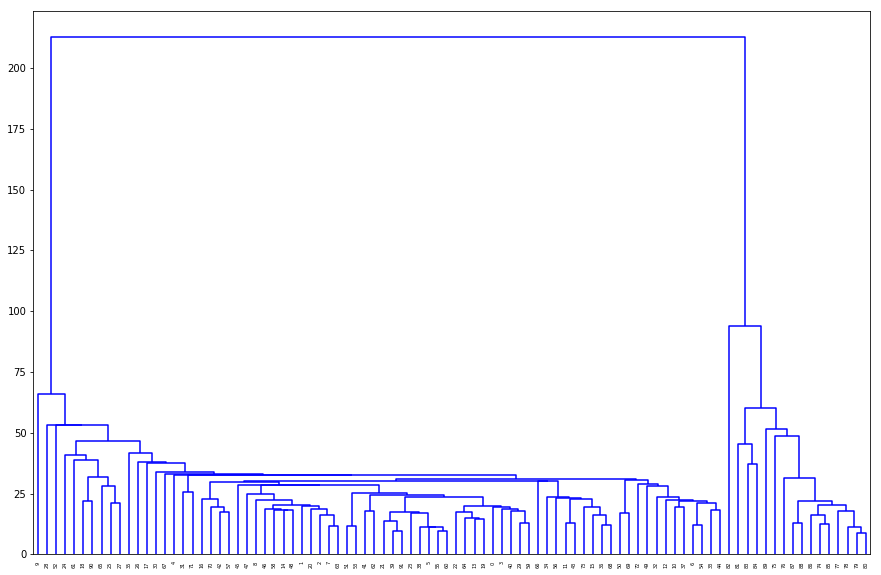

In [10]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
distance_mat = pdist(dataFeatures)
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

С помощью PCA мы визуализируем результаты кластеризаций, полученных с помощью k-Means и Agglomerative clustering

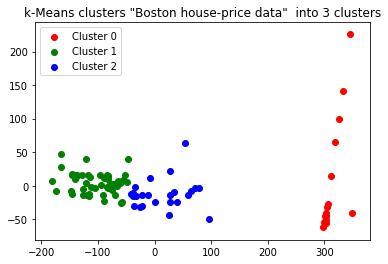

In [11]:
import pylab as pl
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(dataFeatures)
pca_2d = pca.transform(dataFeatures)

for i in range(0, pca_2d.shape[0]):
        if kmeans.labels_[i] == 0:
            c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
        elif kmeans.labels_[i] == 1:
            c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
        elif kmeans.labels_[i] == 2:
            c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='o')
pl.legend([c1, c2, c3],['Cluster 0', 'Cluster 1','Cluster 2'])
pl.title('k-Means clusters "Boston house-price data"  into 3 clusters')
pl.show()

## 6. Регрессионные модели и предсказания
Будем использовать 3 различных метрики для исследования эффективности наших моделей. Чем больше значение метрики на выборке, тем хуже наша предсказательная сила.

RMSE - Root Mean Square Error:
\begin{equation*}
RMSE = \sqrt{\frac{\sum_{i = 1}^{n}{(y_i - \hat{y}_i)^2}}{n}}
\end{equation*}

MAE - Mean Absolute Error:
\begin{equation*}
MAE = \frac{1}{n} \sum_{i = 1}^{n} |y_i - \hat{y}_i|
\end{equation*}

R2 - Mean Absolute Error:
\begin{equation*}
R2 = 1 - \frac{\sum_{i = 1}^{n} (y_i - \overline{y})^2}{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}
\end{equation*}

Для начала обучим обычную линейную регрессию на обучающей выборке и протестируем её на тестовой.

In [20]:
dataFeatures = (data[data.columns.difference(['MEDV'])].as_matrix()).astype(double)

modelRegression = linear_model.LinearRegression(normalize = True)
modelRegression.fit(X_train, y_train)
rmse = mean_squared_error(modelRegression.predict(X_test), y_test) ** (0.5)
mae = mean_absolute_error(modelRegression.predict(X_test), y_test)
r2 = abs(r2_score(modelRegression.predict(X_test), y_test))
print("= Linear regression model error statistics =")
print("rmse =", rmse, ", mae =", mae, ", r2 =", r2)

= Linear regression model error statistics =
rmse = 3.7140519401141145 , mae = 3.0126764793053655 , r2 = 0.7601771439902266


Нас интересует, как мы можем улучшить предсказательную силу. Мы можем добавить L1 (Lasso) или L2 (Ridge) регуляризаторы, штрафующие за слишком большие веса и позволяющие избежать переобучения - но тогда нам необходимо подобрать подходящий параметр регуляризации - насколько сильно мы будем штрафовать за большие веса.

= Non-zero weights count (varying alpha parameter) =
Lasso: [12, 12, 4, 0, 0, 0, 0]
Ridge: [12, 12, 12, 10, 8, 4, 3]


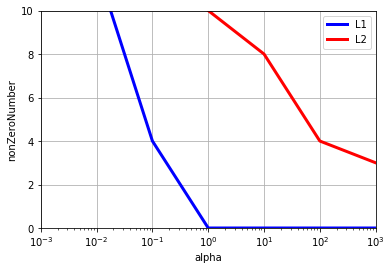

In [21]:
nonZerosNums1 = []
nonZerosNums2 = []
alphas = []
for alphaDegree in range (-3, 4):
    alpha = 10 ** alphaDegree
    alphas.append(alpha)
    modelLasso = linear_model.Lasso(alpha = alpha, normalize = True)
    modelRidge = linear_model.Ridge(alpha = alpha, normalize = True)
    modelLasso.fit(X_train, y_train)
    modelRidge.fit(X_train, y_train)
    coefs1 = modelLasso.coef_
    nonZerosNum1 = (coefs1[np.where(abs(coefs1) > 0.01)]).size
    coefs2 = modelRidge.coef_
    nonZerosNum2 = (coefs2[np.where(abs(coefs2) > 0.01)]).size
    nonZerosNums1.append(nonZerosNum1)
    nonZerosNums2.append(nonZerosNum2)
print("= Non-zero weights count (varying alpha parameter) =")
print("Lasso:", nonZerosNums1)
print("Ridge:", nonZerosNums2)

plt.plot(11, 7)
plt.semilogx(alphas, nonZerosNums1, label = 'L1', color = 'blue', linewidth = 3.0)
plt.semilogx(alphas, nonZerosNums2, label = 'L2', color = 'red', linewidth = 3.0)
plt.axis([0.001, 1000, 0, 10])
plt.xlabel('alpha')
plt.ylabel('nonZeroNumber')
plt.legend()
plt.grid()
plt.show()

Как известно, Lasso имеет свойство занулять некоторые (незначительные) веса. С другой стороны, все веса занулить мы не можем, поэтому искать параметр alpha между 0.01 и 0.1 - хорошая идея.

In [22]:
print("= Lasso Regression error statistics (varying alpha parameter) =", '\n')
for alphaDegree in range (-3, 4):
    alpha = 10 ** alphaDegree
    modelLasso = linear_model.Lasso(alpha = alpha, normalize = True)
    modelLasso.fit(X_train, y_train)
    rmse = mean_squared_error(modelLasso.predict(X_test), y_test) ** (0.5)
    mae = mean_absolute_error(modelLasso.predict(X_test), y_test)
    r2 = abs(r2_score(modelLasso.predict(X_test), y_test))
    print("alpha =", alpha, ", rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

= Lasso Regression error statistics (varying alpha parameter) = 

alpha = 0.001 , rmse = 3.708250011144811 , mae = 3.001929142444783 , r2 = 0.7601435297412069 

alpha = 0.01 , rmse = 3.718184525578259 , mae = 2.928937198839925 , r2 = 0.75356861373488 

alpha = 0.1 , rmse = 4.340088636908993 , mae = 3.156709661433814 , r2 = 0.5730582922194315 

alpha = 1 , rmse = 9.410051419581679 , mae = 7.087519078144078 , r2 = 7.795088808601212e+29 

alpha = 10 , rmse = 9.410051419581679 , mae = 7.087519078144078 , r2 = 7.795088808601212e+29 

alpha = 100 , rmse = 9.410051419581679 , mae = 7.087519078144078 , r2 = 7.795088808601212e+29 

alpha = 1000 , rmse = 9.410051419581679 , mae = 7.087519078144078 , r2 = 7.795088808601212e+29 



Как можно видеть, две из трёх метрик только начинают расти после alpha = 0.01, зато значение последней метрики сильно уменьшается.

Проведём дальнейшее исследование:

In [23]:
print("= Further research =", '\n')
for alphaDegree in range (1, 11):
    alpha = 0.01 * alphaDegree
    modelLasso = linear_model.Lasso(alpha = alpha, normalize = True)
    modelLasso.fit(X_train, y_train)
    rmse = mean_squared_error(modelLasso.predict(X_test), y_test) ** (0.5)
    mae = mean_absolute_error(modelLasso.predict(X_test), y_test)
    r2 = abs(r2_score(modelLasso.predict(X_test), y_test))
    print ("alpha =", alpha, ", rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

= Further research = 

alpha = 0.01 , rmse = 3.718184525578259 , mae = 2.928937198839925 , r2 = 0.75356861373488 

alpha = 0.02 , rmse = 3.8543156204006332 , mae = 2.8835888663916727 , r2 = 0.733053063616253 

alpha = 0.03 , rmse = 3.977957308870885 , mae = 2.9875659949589624 , r2 = 0.7096006115117945 

alpha = 0.04 , rmse = 4.087887814415178 , mae = 3.0120544161540392 , r2 = 0.6824413090796128 

alpha = 0.05 , rmse = 4.1776657500221415 , mae = 3.0173449837960296 , r2 = 0.6668083956620219 

alpha = 0.06 , rmse = 4.258387708202611 , mae = 3.0290826870101286 , r2 = 0.6485023838300876 

alpha = 0.07 , rmse = 4.269022483061473 , mae = 3.0423104734991844 , r2 = 0.6329126398065045 

alpha = 0.08 , rmse = 4.286438938004775 , mae = 3.080539066329052 , r2 = 0.6152417951034967 

alpha = 0.09 , rmse = 4.310013491849054 , mae = 3.1185650769970903 , r2 = 0.595392748308988 

alpha = 0.1 , rmse = 4.340088636908993 , mae = 3.156709661433814 , r2 = 0.5730582922194315 



Лучшее значение, вероятно, 0.02.

Для Ridge:

In [24]:
print("= Ridge Regression error statistics (varying alpha parameter) =", '\n')
for alphaDegree in range (-3, 4):
    alpha = 10 ** alphaDegree
    modelRidge = linear_model.Ridge(alpha = alpha, normalize = True)
    modelRidge.fit(X_train, y_train)
    rmse = mean_squared_error(modelRidge.predict(X_test), y_test) ** (0.5)
    mae = mean_absolute_error(modelRidge.predict(X_test), y_test)
    r2 = abs(r2_score(modelRidge.predict(X_test), y_test))
    print("alpha =", alpha, ", rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

= Ridge Regression error statistics (varying alpha parameter) = 

alpha = 0.001 , rmse = 3.709463687811784 , mae = 3.0083960557488454 , r2 = 0.7603273044933454 

alpha = 0.01 , rmse = 3.6816290956831033 , mae = 2.976537662537422 , r2 = 0.7603401320454419 

alpha = 0.1 , rmse = 3.755910136685982 , mae = 2.893288840463678 , r2 = 0.723947161393404 

alpha = 1 , rmse = 4.982677111668967 , mae = 3.9808377618765696 , r2 = 0.08551223614358161 

alpha = 10 , rmse = 7.845229733206153 , mae = 6.053430157915253 , r2 = 14.81124522494432 

alpha = 100 , rmse = 9.172262313553507 , mae = 6.910902181616978 , r2 = 905.2632986243 

alpha = 1000 , rmse = 9.384839525772623 , mae = 7.068927502930916 , r2 = 84396.58062122577 



Наилучшее значение также между 0.01 и 0.1.

In [25]:
print("= Further research =", '\n')
for alphaDegree in range (1, 11):
    alpha = 0.01 * alphaDegree
    modelRidge = linear_model.Ridge(alpha = alpha, normalize = True)
    modelRidge.fit(X_train, y_train)
    rmse = mean_squared_error(modelRidge.predict(X_test), y_test) ** (0.5)
    mae = mean_absolute_error(modelRidge.predict(X_test), y_test)
    r2 = abs(r2_score(modelRidge.predict(X_test), y_test))
    print("alpha =", alpha, ", rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

= Further research = 

alpha = 0.01 , rmse = 3.6816290956831033 , mae = 2.976537662537422 , r2 = 0.7603401320454419 

alpha = 0.02 , rmse = 3.6698634666754146 , mae = 2.9533787458583207 , r2 = 0.7584359490962936 

alpha = 0.03 , rmse = 3.6695217558760747 , mae = 2.9345348310569226 , r2 = 0.7553690614022099 

alpha = 0.04 , rmse = 3.67570593345432 , mae = 2.9190094952639773 , r2 = 0.7516188242221149 

alpha = 0.05 , rmse = 3.6857029527578713 , mae = 2.906103734235935 , r2 = 0.747450652802594 

alpha = 0.06 , rmse = 3.6979579774161455 , mae = 2.895309671836371 , r2 = 0.7430165155442328 

alpha = 0.07 , rmse = 3.7115561494014115 , mae = 2.88624755611357 , r2 = 0.7384056062455888 

alpha = 0.08 , rmse = 3.7259485297808213 , mae = 2.8873497911448305 , r2 = 0.7336711616654221 

alpha = 0.09 , rmse = 3.740801328679794 , mae = 2.8901747751525746 , r2 = 0.7288452422357186 

alpha = 0.1 , rmse = 3.755910136685982 , mae = 2.893288840463678 , r2 = 0.723947161393404 



Мы выбрали alpha = 0.07, поскольку MAE начинает расти после этого значения.

Суммируя результаты:

In [26]:
print("= Linear regression model error statistics =")
rmse = mean_squared_error(modelRegression.predict(X_test), y_test) ** (0.5)
mae = mean_absolute_error(modelRegression.predict(X_test), y_test)
r2 = abs(r2_score(modelRegression.predict(X_test), y_test))
print("rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

print("= Lasso regression model error statistics (best alpha = 0.02) =")
alpha = 0.02
modelLasso = linear_model.Lasso(alpha = alpha, normalize = True)
modelLasso.fit(X_train, y_train)
rmse = mean_squared_error(modelLasso.predict(X_test), y_test) ** (0.5)
mae = mean_absolute_error(modelLasso.predict(X_test), y_test)
r2 = abs(r2_score(modelLasso.predict(X_test), y_test))
print("rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

print("= Ridge regression model error statistics (best alpha = 0.07) =")
alpha = 0.07
modelRidge = linear_model.Ridge(alpha = alpha, normalize = True)
modelRidge.fit(X_train, y_train)
rmse = mean_squared_error(modelRidge.predict(X_test), y_test) ** (0.5)
mae = mean_absolute_error(modelRidge.predict(X_test), y_test)
r2 = abs(r2_score(modelRidge.predict(X_test), y_test))
print("rmse =", rmse, ", mae =", mae, ", r2 =", r2, '\n')

= Linear regression model error statistics =
rmse = 3.7140519401141145 , mae = 3.0126764793053655 , r2 = 0.7601771439902266 

= Lasso regression model error statistics (best alpha = 0.02) =
rmse = 3.8543156204006332 , mae = 2.8835888663916727 , r2 = 0.733053063616253 

= Ridge regression model error statistics (best alpha = 0.07) =
rmse = 3.7115561494014115 , mae = 2.88624755611357 , r2 = 0.7384056062455888 



Можно видеть несколько лучшие результаты после регуляризации (кроме RMSE для Lasso) по сравнению с обычной линейной регрессией.

Теперь попробуем применить кросс-валидацию и также подобрать веса. Мы уже знаем по опыту, что лучшие значения alpha находятся где-то между 0.01 и 1, поэтому мы можем просто перебрать их все и выдать наилучшие результаты:

In [27]:
alphas = []
for alphaDegree in range(1, 101):
    alphas.append(0.01 * alphaDegree)
crossValidator = model_selection.KFold(n_splits = 3, shuffle = False)

Best alpha = 0.12 , RMSE = 6.396806951971665 

Best alpha = 0.12 , MAE = 4.177670759875035 

Best alpha = 0.13 , R2 = 0.36537607849057663 



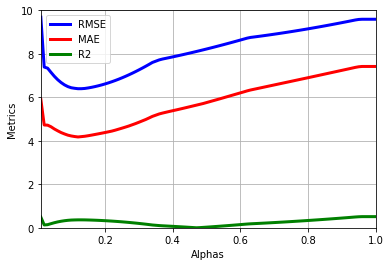

In [28]:
#

bestAlphasLasso = []
bestResultsLasso = []

modelLasso = linear_model.Lasso(normalize = True)
res = model_selection.GridSearchCV(estimator = modelLasso, param_grid = dict(alpha = alphas), cv = crossValidator, scoring = 'neg_mean_squared_error')
res.fit(dataFeatures, dataTarget)
rmseLasso = res.cv_results_['mean_test_score']
print("Best alpha =", res.best_params_['alpha'], ", RMSE =", abs(res.best_score_) ** 0.5, '\n')
bestAlphasLasso.append(res.best_params_['alpha'])
bestResultsLasso.append(abs(res.best_score_) ** 0.5)
LassoWeights1 = res.best_estimator_.coef_

modelLasso = linear_model.Lasso(normalize = True)
res = model_selection.GridSearchCV(estimator = modelLasso, param_grid = dict(alpha = alphas), cv = crossValidator, scoring = 'neg_mean_absolute_error')
res.fit(dataFeatures, dataTarget)
maeLasso = res.cv_results_['mean_test_score']
print("Best alpha =", res.best_params_['alpha'], ", MAE =", abs(res.best_score_), '\n')
bestAlphasLasso.append(res.best_params_['alpha'])
bestResultsLasso.append(abs(res.best_score_))
LassoWeights2 = res.best_estimator_.coef_

modelLasso = linear_model.Lasso(normalize = True)
res = model_selection.GridSearchCV(estimator = modelLasso, param_grid = dict(alpha = alphas), cv = crossValidator, scoring = 'r2')
res.fit(dataFeatures, dataTarget)
r2Lasso = res.cv_results_['mean_test_score']
print("Best alpha =", res.best_params_['alpha'], ", R2 =", abs(res.best_score_), '\n')
bestAlphasLasso.append(res.best_params_['alpha'])
bestResultsLasso.append(abs(res.best_score_))
LassoWeights3 = res.best_estimator_.coef_

plt.plot(10, 7)
plt.plot(alphas, abs(rmseLasso) ** 0.5, label = 'RMSE', color = 'blue', linewidth = 3.0)
plt.plot(alphas, abs(maeLasso), label = 'MAE', color = 'red', linewidth = 3.0)
plt.plot(alphas, abs(r2Lasso), label = 'R2', color = 'green', linewidth = 3.0)
plt.axis([0.01, 1, 0, 10])
plt.xlabel('Alphas')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

Best alpha = 0.88 , RMSE = 5.990409000304105 

Best alpha = 0.64 , MAE = 4.035251630929262 

Best alpha = 0.86 , R2 = 0.41526927552202386 



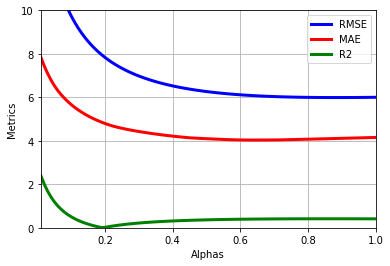

In [29]:
bestAlphasRidge = []
bestResultsRidge = []

modelRidge = linear_model.Ridge(normalize = True)
res = model_selection.GridSearchCV(estimator = modelRidge, param_grid = dict(alpha = alphas), cv = crossValidator, scoring = 'neg_mean_squared_error')
res.fit(dataFeatures, dataTarget)
rmseRidge = res.cv_results_['mean_test_score']
print("Best alpha =", res.best_params_['alpha'], ", RMSE =", abs(res.best_score_) ** 0.5, '\n')
bestAlphasRidge.append(res.best_params_['alpha'])
bestResultsRidge.append(abs(res.best_score_) ** 0.5)
RidgeWeights1 = res.best_estimator_.coef_

modelRidge = linear_model.Ridge(normalize = True)
res = model_selection.GridSearchCV(estimator = modelRidge, param_grid = dict(alpha = alphas), cv = crossValidator, scoring = 'neg_mean_absolute_error')
res.fit(dataFeatures, dataTarget)
maeRidge = res.cv_results_['mean_test_score']
print("Best alpha =", res.best_params_['alpha'], ", MAE =", abs(res.best_score_), '\n')
bestAlphasRidge.append(res.best_params_['alpha'])
bestResultsRidge.append(abs(res.best_score_))
RidgeWeights2 = res.best_estimator_.coef_

modelRidge = linear_model.Ridge(normalize = True)
res = model_selection.GridSearchCV(estimator = modelRidge, param_grid = dict(alpha = alphas), cv = crossValidator, scoring = 'r2')
res.fit(dataFeatures, dataTarget)
r2Ridge = res.cv_results_['mean_test_score']
print("Best alpha =", res.best_params_['alpha'], ", R2 =", abs(res.best_score_), '\n')
bestAlphasRidge.append(res.best_params_['alpha'])
bestResultsRidge.append(abs(res.best_score_))
RidgeWeights3 = res.best_estimator_.coef_

plt.plot(10, 7)
plt.plot(alphas, abs(rmseRidge) ** 0.5, label = 'RMSE', color = 'blue', linewidth = 3.0)
plt.plot(alphas, abs(maeRidge), label = 'MAE', color = 'red', linewidth = 3.0)
plt.plot(alphas, abs(r2Ridge), label = 'R2', color = 'green', linewidth = 3.0)
plt.axis([0.01, 1, 0, 10])
plt.xlabel('Alphas')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

Суммируя результаты:

In [30]:
#

print ("= Linear regression model error statistics =")
modelRegression = linear_model.LinearRegression(normalize = True)

res = model_selection.GridSearchCV(estimator = modelRegression, param_grid = dict(), cv = crossValidator, scoring = 'neg_mean_squared_error')
res.fit(X_train, y_train)
rmse = res.cv_results_['mean_test_score'][0]

res = model_selection.GridSearchCV(estimator = modelRegression, param_grid = dict(), cv = crossValidator, scoring = 'neg_mean_absolute_error')
res.fit(X_train, y_train)
mae = res.cv_results_['mean_test_score'][0]

res = model_selection.GridSearchCV(estimator = modelRegression, param_grid = dict(), cv = crossValidator, scoring = 'r2')
res.fit(X_train, y_train)
r2 = res.cv_results_['mean_test_score'][0]

print("rmse =", abs(rmse) ** 0.5)
print("mae =", abs(mae))
print("r2 =", abs(r2))
print("weights:")
print(res.best_estimator_.coef_)

print("= Lasso regression model error statistics (best alpha) =")
print("rmse =", bestResultsLasso[0], ", alpha =", bestAlphasLasso[0])
print("weights (best estimator for RMSE metric):")
print(LassoWeights1)
print("mae =", bestResultsLasso[1], ", alpha =", bestAlphasLasso[1])
print("weights (best estimator for MAE metric):")
print(LassoWeights2)
print("r2 =", bestResultsLasso[2], ", alpha =", bestAlphasLasso[2])
print("weights (best estimator for R2 metric):")
print(LassoWeights3)

print("= Ridge regression model error statistics (best alpha) =")
print("rmse =", bestResultsRidge[0], ", alpha =", bestAlphasRidge[0])
print("weights (best estimator for RMSE metric):")
print(RidgeWeights1)
print("mae =", bestResultsRidge[1], ", alpha =", bestAlphasRidge[1])
print("weights (best estimator for MAE metric):")
print(RidgeWeights2)
print("r2 =", bestResultsRidge[2], ", alpha =", bestAlphasRidge[2])
print("weights (best estimator for R2 metric):")
print(RidgeWeights3)

= Linear regression model error statistics =
rmse = 7.031090666159563
mae = 4.576100463406953
r2 = 0.3150232054415696
weights:
[  0.07711475   0.01480345   9.94582868  -0.34709745  -1.29922316
  -0.06441558  -0.30022725 -37.99051492  -0.36864121   0.55902726
   5.30228701  -0.00955487   0.08184362]
= Lasso regression model error statistics (best alpha) =
rmse = 6.396806951971665 , alpha = 0.12
weights (best estimator for RMSE metric):
[-0.          0.          6.58010332 -0.         -0.         -0.
 -0.26347793 -0.         -0.02727182 -0.          7.59639223 -0.
  0.        ]
mae = 4.177670759875035 , alpha = 0.12
weights (best estimator for MAE metric):
[-0.          0.          6.58010332 -0.         -0.         -0.
 -0.26347793 -0.         -0.02727182 -0.          7.59639223 -0.
  0.        ]
r2 = 0.36537607849057663 , alpha = 0.13
weights (best estimator for R2 metric):
[-0.          0.          6.10815587 -0.         -0.         -0.
 -0.25488524 -0.         -0.00274786 -0.        

Получили значительно лучшие результаты после регуляризации в большинстве случаев (кроме R2 для Ridge)

В целом по весам обычной линейной регрессии можем видеть, что самые существенные для стоимости домов признаки - это INDUS (proportion of non-retail business acres per town, влияние прямо пропорциональное), DIS (weighted distances to five Boston employment centres, влияние обратно пропорциональное) и PTRATIO (pupil-teacher ratio by town, влияние прямо пропорциональное). Для регрессии с L2-регуляризацией параметр DIS не оказывает столь существенного влияния, а для L1 - и вовсе зануляется (хотя, возможно, тому виной неточный подбор параметра alpha).

Теперь рассмотрим следующую задачу. Пусть у нас есть некоторое количество денег, и мы хотим предсказать при известных значениях признаков, в каких городах мы сможем приобрести жильё, а в каких - нет. Воспользуемся логистической регрессией для бинарной классификации. Для начала посмотрим на распределение цен:

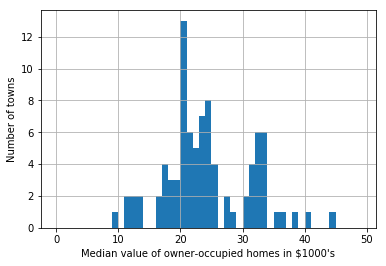

In [31]:
plt.plot()
plt.hist(dataTarget, bins = range(0, 50))
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Number of towns')
plt.grid()
plt.show()

Пусть у нас есть 27 (тысяч долларов) - судя по гистограмме, это хорошее разделяющее значение. Модифицируем Target: заменим цену на 1, если сможем себе позволить жильё в этом городе, и на 0 в противном случае.

In [32]:
ourMoney = 27
logistic_y_train = np.where(y_train < ourMoney, 1, 0)
logistic_y_test = np.where(y_test < ourMoney, 1, 0)

Обучим логистическую регрессию:

In [33]:
modelLogRegression = linear_model.LogisticRegression(penalty = 'l1', solver = 'liblinear')
modelLogRegression.fit(X_train, logistic_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Посмотрим её эффективность на тестовой выборке:

In [34]:
rmse = mean_squared_error(modelLogRegression.predict(X_test), logistic_y_test) ** (0.5)
mae = mean_absolute_error(modelLogRegression.predict(X_test), logistic_y_test)
r2 = abs(r2_score(modelLogRegression.predict(X_test), logistic_y_test))
print("= Logistic regression model error statistics =")
print("rmse =", rmse, ", mae =", mae, ", r2 =", r2)

= Logistic regression model error statistics =
rmse = 0.3779644730092272 , mae = 0.14285714285714285 , r2 = 0.3777777777777779


Получили довольно мощную предсказательную модель для описанной задачи.

## 7. Выводы
В процессе исследования выбранного датасета мы изучили методы кластеризации, такие как: K-means, агломеративная кластеризация, метод распространения близости. Также мы применили линейную и логистическую регрессии, изучили различные метрики ошибки, научились подпирать параметры регуляризации и применили её, таким образом, по весам моделей установи наиболее важные признаки, влияющие на итоговую стоимость дома, и научились предсказывать её.